**Table of contents**<a id='toc0_'></a>    
- [Relationships between variables](#toc1_)    
  - [Covariance](#toc1_1_)    
  - [Measures of correlation](#toc1_2_)    
      - [A more dense read here ](#toc1_2_1_1_)    
    - [Pearson correlation](#toc1_2_2_)    
    - [Spearman correlation](#toc1_2_3_)    
    - [Kendall Tau correlation](#toc1_2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Relationships between variables](#toc0_)

![image.png](https://imgs.search.brave.com/uatPOeWfRfnVWY2MwwPaLkKXledacH5nbNl_JyHVcB0/rs:fit:860:0:0/g:ce/aHR0cHM6Ly93d3cu/c2ltcGx5cHN5Y2hv/bG9neS5vcmcvd3At/Y29udGVudC91cGxv/YWRzL2NvcnJlbGF0/aW9uLmpwZw)

In [1]:
import numpy as np
import pandas as pd
# Show floats with 2 decimals
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
fortune = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/Fortune_1000.csv")
fortune.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.00,"523,964.00","14,881.00",2200000,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690
1,Amazon,2,3.00,"280,522.00","11,588.00",798000,Retailing,Seattle,WA,no,yes,no,yes,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
2,Exxon Mobil,3,-1.00,"264,938.00","14,340.00",74900,Energy,Irving,TX,no,no,no,yes,2.0,Darren W. Woods,https://www.exxonmobil.com,XOM,177923
3,Apple,4,-1.00,"260,174.00","55,256.00",137000,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,https://www.apple.com,AAPL,2221176
4,CVS Health,5,3.00,"256,776.00","6,634.00",290000,Health Care,Woonsocket,RI,no,no,yes,yes,8.0,Karen S. Lynch,https://www.cvshealth.com,CVS,98496


# <a id='toc1_1_'></a>[Covariance](#toc0_)

> Covariance measures how variables vary together. A positive covariance means that the variables vary together in the same direction, a negative covariance means they vary in the opposite direction and 0 covariance means that the variables don’t vary together or they are independent of each other.

In [5]:
# Initial covariance
np.cov(fortune.revenue, fortune.profit)

array([[1.2084643e+09,           nan],
       [          nan,           nan]])

<span style="color:orange">I think you should be bored of me asking this by now but why are there NaNs here?</span>

In [6]:
# Fix dataframe and get covariance
fortune.dropna(subset ='profit', inplace=True)
np.cov(fortune.revenue, fortune.profit)

array([[1.21058071e+09, 9.71236789e+07],
       [9.71236789e+07, 2.03928053e+07]])

![image.png](attachment:image.png)

We can extract the covariance by getting the second element in the 1st row:

In [7]:
# Extract covariance
cov_matrix = np.cov(fortune.revenue, fortune.profit)
cov_matrix[0,1]

97123678.85155451

<span style="color:orange"> Cool, the covariance is positive. What does this mean?</span>

⚠️ **Covariance doesn't measure how strongly the variables vary together!** ⚠️ That's why we use correlation.

Example: With covariance, we can say that when revenue increases, profit also increases but not by how much.

## <a id='toc1_2_'></a>[Measures of correlation](#toc0_)

> Measures the relationship and the dependency between two variables. “Covariance” indicates the direction of the linear relationship > between variables. “Correlation” measures the direction and strength of the linear relationship between two variables. They can be > calculated by:

* Pearson: Measures the strength of **linear** correlation between 2 numerical continuous variables
* Spearman: Measures the strength of **non-linear** correlation between 2 numerical variables (discrete and/or continuous)
> * Kendall: similar to Spearman, but sample sizes are small and is less sensitive to outliers.

This [Stackexchange answer](https://datascience.stackexchange.com/a/64261) explains quite well the differences and assumptions of each correlation.

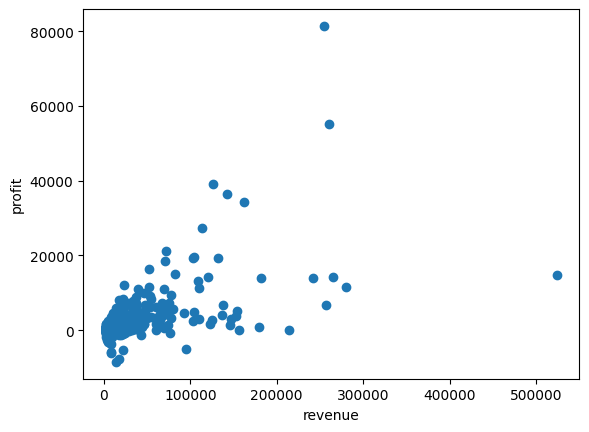

In [9]:
# Let's explore the relationship between profit and revenue like we did last time
plt.scatter(fortune.revenue, fortune.profit)
plt.xlabel('revenue')
plt.ylabel('profit')
plt.show()

### <a id='toc1_2_2_'></a>[Pearson correlation](#toc0_)

- Measures the strength of **linear** correlation between 2 numerical continuous variables

![pearson](https://imgs.search.brave.com/4_7sQIEbqLJM53We4YKYA13ibgVmnBKksdKFpRQvaLU/rs:fit:860:0:0/g:ce/aHR0cHM6Ly93d3cu/cXVlc3Rpb25wcm8u/Y29tL2Jsb2cvd3At/Y29udGVudC91cGxv/YWRzLzIwMjAvMDQv/UGVhcnNvbi1jb3Jy/ZWxhdGlvbi1jb2Vm/ZmljaWVudC0xLmpw/Zw)

In [12]:
# Check correlation matrix - default is pearson correlation
fortune.corr(numeric_only=True)

,rank,rank_change,revenue,profit,num. of employees
rank,1.00,-0.05,-0.52,-0.36,-0.36
rank_change,-0.05,1.00,0.02,0.04,0.01
revenue,-0.52,0.02,1.00,0.62,0.73
profit,-0.36,0.04,0.62,1.00,0.36
num. of employees,-0.36,0.01,0.73,0.36,1.00


In [13]:
# Add styling
fortune_corr = fortune.corr()
fortune_corr.style.background_gradient(cmap='RdYlGn').format('{:,.2f}')

<ipython-input-13-3ecc221feb38>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fortune_corr = fortune.corr()


,rank,rank_change,revenue,profit,num. of employees
rank,1.00,-0.05,-0.52,-0.36,-0.36
rank_change,-0.05,1.00,0.02,0.04,0.01
revenue,-0.52,0.02,1.00,0.62,0.73
profit,-0.36,0.04,0.62,1.00,0.36
num. of employees,-0.36,0.01,0.73,0.36,1.00


<Axes: >

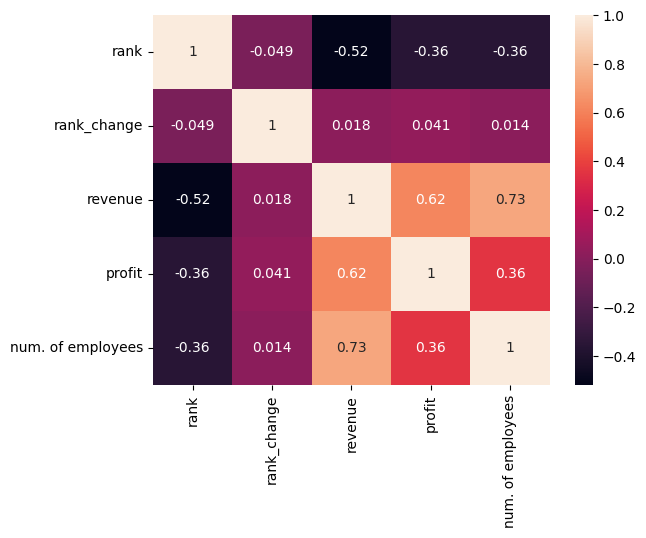

In [14]:
# Create heatmap in seaborn
sns.heatmap(fortune_corr, annot=True)

Let's remove the duplicated values in our plot:

<Axes: >

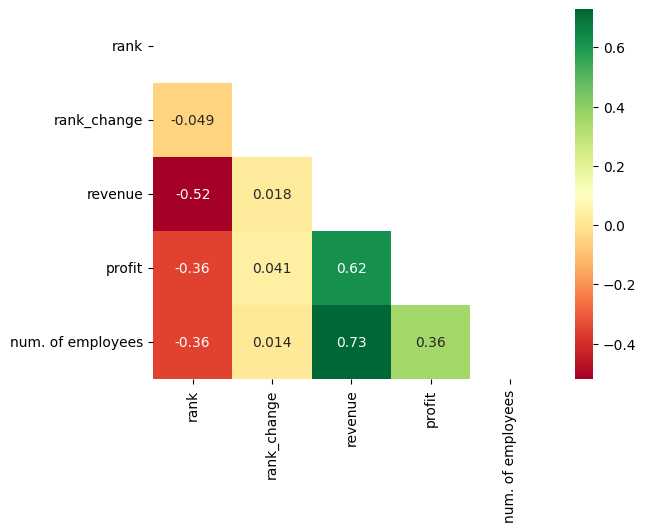

In [20]:
# Create mask for upper triangle
mask = np.zeros_like(fortune_corr)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
sns.heatmap(fortune_corr, mask =mask, annot=True, cmap = 'RdYlGn')

### <a id='toc1_2_3_'></a>[Spearman correlation](#toc0_)

- Measures the strength of **non-linear** correlation between 2 numerical variables (discrete and/or continuous)

![spearman](https://imgs.search.brave.com/V76zc-JGOOuPAUO-S0KYm46FuQPrFY3cH4lX2kavgQw/rs:fit:860:0:0/g:ce/aHR0cHM6Ly93d3cu/c2ltcGxpbGVhcm4u/Y29tL2ljZTkvZnJl/ZV9yZXNvdXJjZXNf/YXJ0aWNsZV90aHVt/Yi9TcGVhcm1hbiVF/MiU4MCU5OXNfUmFu/a19Db3JyZWxhdGlv/bl8xLmpwZw)

In [21]:
# Check correlation matrix
round(fortune.corr(method='spearman'), 2)

<ipython-input-21-6702785eb27f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(fortune.corr(method='spearman'), 2)


,rank,rank_change,revenue,profit,num. of employees
rank,1.00,-0.02,-1.00,-0.55,-0.64
rank_change,-0.02,1.00,0.02,0.15,0.06
revenue,-1.00,0.02,1.00,0.55,0.64
profit,-0.55,0.15,0.55,1.00,0.34
num. of employees,-0.64,0.06,0.64,0.34,1.00


In [22]:
# Add styling
fortune_corr = fortune.corr(method = 'spearman')
fortune_corr.style.background_gradient(cmap='RdYlGn').format('{:,.2f}')

<ipython-input-22-d91991e88d61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fortune_corr = fortune.corr(method = 'spearman')


,rank,rank_change,revenue,profit,num. of employees
rank,1.00,-0.02,-1.00,-0.55,-0.64
rank_change,-0.02,1.00,0.02,0.15,0.06
revenue,-1.00,0.02,1.00,0.55,0.64
profit,-0.55,0.15,0.55,1.00,0.34
num. of employees,-0.64,0.06,0.64,0.34,1.00


<Axes: >

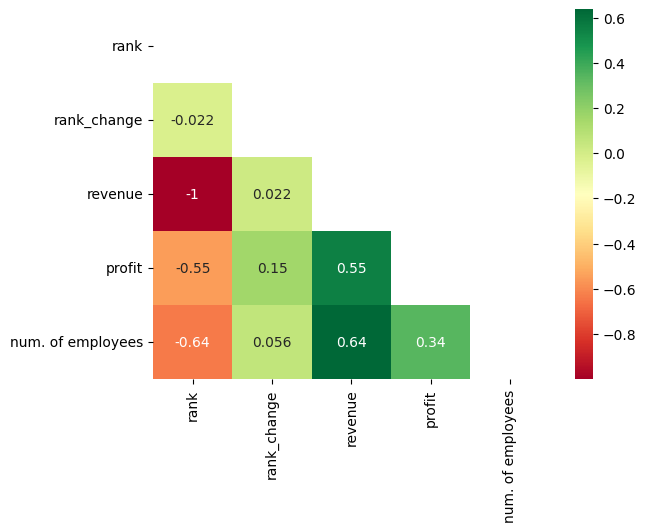

In [23]:
# Create heatmap in seaborn without upper triangle
mask = np.zeros_like(fortune_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(fortune_corr, mask=mask, annot=True, cmap='RdYlGn')



In [24]:
fortune['Market Cap'].dtype

dtype('O')

In [27]:
fortune['Market Cap'] = pd.to_numeric(fortune['Market Cap'], errors='coerce')

In [28]:
fortune['Market Cap'].dtype

dtype('float64')

### <a id='toc1_2_4_'></a>[Kendall Tau correlation](#toc0_)

> * Kendall: similar to Spearman, but sample sizes are small and is less sensitive to outliers.

In [34]:
# Check correlation matrix
fortune.corr(method = 'kendall', numeric_only=True)
fortune_corr.style.background_gradient(cmap='RdYlGn').format('{:,.2f}')

,rank,rank_change,revenue,profit,num. of employees
rank,1.00,-0.02,-1.00,-0.55,-0.64
rank_change,-0.02,1.00,0.02,0.15,0.06
revenue,-1.00,0.02,1.00,0.55,0.64
profit,-0.55,0.15,0.55,1.00,0.34
num. of employees,-0.64,0.06,0.64,0.34,1.00


In [30]:
# Add styling

fortune_corr.style.background_gradient(cmap='RdYlGn').format('{:,.2f}')

,rank,rank_change,revenue,profit,num. of employees
rank,1.00,-0.02,-1.00,-0.55,-0.64
rank_change,-0.02,1.00,0.02,0.15,0.06
revenue,-1.00,0.02,1.00,0.55,0.64
profit,-0.55,0.15,0.55,1.00,0.34
num. of employees,-0.64,0.06,0.64,0.34,1.00


In [31]:
# Create heatmap in seaborn without upper triangle
mask = np.zeros_like(fortune_corr)
mask[np.triu_indices_from(mask)] = True



# Extra: Correlation among different types of variables

We typically look at correlation between numerical values only as it's the simplest to quantify. However, if you are interested in learning about different types of correlations, e.g. categorical & categorical data, numerical & categorical data, you can read [this article](https://archive.ph/20210208110902/https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365).

# Extra: Covariance maths

This is the covariance in typical maths syntax:  
  
![image.png](https://miro.medium.com/v2/resize:fit:828/0*Vf0PmWaZUL4CtPC_)

Where:
- Σ = big sigma greek letter. In maths, this means sum.
- d = In general maths, this is a differential (fancy for very, very small interval). In this context, it means the difference between a variable and its mean.
- n = sample size

It is called covariance because it looks at the variance of 2 variables instead of 1. If you remember, the variance was the squared sum of differences between elements and their mean:

In [ ]:
shoe_sizes = [46, 46, 44.5, 44.5, 42, 42, 42, 39.5, 39, 44, 39, 39, 37, 38, 34.5, 36.5, 38, 38, 36]
heights = [192, 184, 184, 184, 182, 179, 175, 174, 174, 172, 172, 170, 165, 162, 160, 158, 157, 154, 153]

shoe_size_mean = np.mean(shoe_sizes)
height_mean = np.mean(heights)

In [ ]:
variance = sum([(shoe_size - shoe_size_mean) ** 2 for shoe_size in shoe_sizes])
variance

We can also write the square as a product:

In [ ]:
variance = sum([(shoe_size - shoe_size_mean) * (shoe_size - shoe_size_mean) for shoe_size in shoe_sizes])
variance

And we can see how the covariance is simply replacing the second difference with that of another variable:

In [ ]:
covariance = sum([(shoe_size - shoe_size_mean) * (height - height_mean) for (shoe_size, height) in zip(shoe_sizes, heights)])
covariance

The covariance is positive, therefore when the height increases, the shoe size also increases and viceversa, which makes sense.